In [1]:
# TODO


# Preprocessing Explained

In [1]:
import tensorflow as tf
import numpy as np 
import matplotlib.pyplot as plt

In [2]:
# create a dataset consisting of Tensors ranging from 0 to 9
dataset = tf.data.Dataset.range(10)
for val in dataset:
   print(val)
# Tensor object can be converted to numpy using .numpy()

tf.Tensor(0, shape=(), dtype=int64)
tf.Tensor(1, shape=(), dtype=int64)
tf.Tensor(2, shape=(), dtype=int64)
tf.Tensor(3, shape=(), dtype=int64)
tf.Tensor(4, shape=(), dtype=int64)
tf.Tensor(5, shape=(), dtype=int64)
tf.Tensor(6, shape=(), dtype=int64)
tf.Tensor(7, shape=(), dtype=int64)
tf.Tensor(8, shape=(), dtype=int64)
tf.Tensor(9, shape=(), dtype=int64)


In [4]:
dataset = tf.data.Dataset.range(10)
dataset = dataset.window(5, shift=1, drop_remainder=True)
for window_dataset in dataset:
    for val in window_dataset:
        print(val, end=" ")
    print()
# you can see that each number in the window is of type tf.Dataset so you change it to a number using .numpy() method


tf.Tensor(0, shape=(), dtype=int64) tf.Tensor(1, shape=(), dtype=int64) tf.Tensor(2, shape=(), dtype=int64) tf.Tensor(3, shape=(), dtype=int64) tf.Tensor(4, shape=(), dtype=int64) 
tf.Tensor(1, shape=(), dtype=int64) tf.Tensor(2, shape=(), dtype=int64) tf.Tensor(3, shape=(), dtype=int64) tf.Tensor(4, shape=(), dtype=int64) tf.Tensor(5, shape=(), dtype=int64) 
tf.Tensor(2, shape=(), dtype=int64) tf.Tensor(3, shape=(), dtype=int64) tf.Tensor(4, shape=(), dtype=int64) tf.Tensor(5, shape=(), dtype=int64) tf.Tensor(6, shape=(), dtype=int64) 
tf.Tensor(3, shape=(), dtype=int64) tf.Tensor(4, shape=(), dtype=int64) tf.Tensor(5, shape=(), dtype=int64) tf.Tensor(6, shape=(), dtype=int64) tf.Tensor(7, shape=(), dtype=int64) 
tf.Tensor(4, shape=(), dtype=int64) tf.Tensor(5, shape=(), dtype=int64) tf.Tensor(6, shape=(), dtype=int64) tf.Tensor(7, shape=(), dtype=int64) tf.Tensor(8, shape=(), dtype=int64) 
tf.Tensor(5, shape=(), dtype=int64) tf.Tensor(6, shape=(), dtype=int64) tf.Tensor(7, shape=(), 

In [3]:
dataset = tf.data.Dataset.range(10)
dataset = dataset.window(5, shift=1)
for window_dataset in dataset:
    for val in window_dataset:
        print(val.numpy(), end=" ")
    print()
# when you have drop_remainder=False, you get windows which is smaller than your window size in the extremeties of your data

0 1 2 3 4 
1 2 3 4 5 
2 3 4 5 6 
3 4 5 6 7 
4 5 6 7 8 
5 6 7 8 9 
6 7 8 9 
7 8 9 
8 9 
9 


In [5]:
dataset = tf.data.Dataset.range(10)
dataset = dataset.window(5, shift=1, drop_remainder=True)
# by doing this you will have an array in each dataset by batching them in groups of 5
dataset = dataset.flat_map(lambda window: window.batch(5))
for window in dataset:
    print(window)   

tf.Tensor([0 1 2 3 4], shape=(5,), dtype=int64)
tf.Tensor([1 2 3 4 5], shape=(5,), dtype=int64)
tf.Tensor([2 3 4 5 6], shape=(5,), dtype=int64)
tf.Tensor([3 4 5 6 7], shape=(5,), dtype=int64)
tf.Tensor([4 5 6 7 8], shape=(5,), dtype=int64)
tf.Tensor([5 6 7 8 9], shape=(5,), dtype=int64)


In [6]:
dataset = tf.data.Dataset.range(10)
dataset = dataset.window(5, shift=1, drop_remainder=True)
# we arent really batching it together, we are just using the methods to get arrays
dataset = dataset.flat_map(lambda window: window.batch(5))
# you then split them into inputs and labels
dataset = dataset.map(lambda window: (window[:-1], window[-1:]))
for x,y in dataset:
    print(x,"-->", y)

tf.Tensor([0 1 2 3], shape=(4,), dtype=int64) --> tf.Tensor([4], shape=(1,), dtype=int64)
tf.Tensor([1 2 3 4], shape=(4,), dtype=int64) --> tf.Tensor([5], shape=(1,), dtype=int64)
tf.Tensor([2 3 4 5], shape=(4,), dtype=int64) --> tf.Tensor([6], shape=(1,), dtype=int64)
tf.Tensor([3 4 5 6], shape=(4,), dtype=int64) --> tf.Tensor([7], shape=(1,), dtype=int64)
tf.Tensor([4 5 6 7], shape=(4,), dtype=int64) --> tf.Tensor([8], shape=(1,), dtype=int64)
tf.Tensor([5 6 7 8], shape=(4,), dtype=int64) --> tf.Tensor([9], shape=(1,), dtype=int64)


In [7]:
dataset = tf.data.Dataset.range(10)
dataset = dataset.window(5, shift=1, drop_remainder=True)
dataset = dataset.flat_map(lambda window: window.batch(5))
dataset = dataset.map(lambda window: (window[:-1], window[-1:]))
# note that the map methods must return Tensor objects otherwise theyll throw an error
# then you shuffle them
dataset = dataset.shuffle(buffer_size=10) 
# buffer_size is the number of elements that it preloads from dataset and randomly selects from
for x,y in dataset:
    print(x, "-->", y)

tf.Tensor([2 3 4 5], shape=(4,), dtype=int64) --> tf.Tensor([6], shape=(1,), dtype=int64)
tf.Tensor([0 1 2 3], shape=(4,), dtype=int64) --> tf.Tensor([4], shape=(1,), dtype=int64)
tf.Tensor([3 4 5 6], shape=(4,), dtype=int64) --> tf.Tensor([7], shape=(1,), dtype=int64)
tf.Tensor([4 5 6 7], shape=(4,), dtype=int64) --> tf.Tensor([8], shape=(1,), dtype=int64)
tf.Tensor([1 2 3 4], shape=(4,), dtype=int64) --> tf.Tensor([5], shape=(1,), dtype=int64)
tf.Tensor([5 6 7 8], shape=(4,), dtype=int64) --> tf.Tensor([9], shape=(1,), dtype=int64)


**A note on shuffling the data**

You are training the model to forecast one time step forward using the 4 inputs. So you are not shuffling the timeseries data. What you are shuffling is the order in which the model trains on these windows. This is to remove the sequence bias so that our model doesnt get used to a specific trend in the timeseries because it is seeing it in that order. Also, it is done for optimisation because it is more efficient to estimate the weights because gradient descent works better (Nicolas Le Roux and Marc Schmidt). 


In [8]:
dataset = tf.data.Dataset.range(10)
dataset = dataset.window(5, shift=1, drop_remainder=True)
dataset = dataset.flat_map(lambda window: window.batch(5))
dataset = dataset.map(lambda window: (window[:-1], window[-1:]))
dataset = dataset.shuffle(buffer_size=10)
# then you batch the data
dataset = dataset.batch(2).prefetch(1)
for x,y in dataset:
    print("x = ", x)
    print("y = ", y)
# prefetch allows the pipeline to preprocess batches while the current batch is being processed. This improves latency

x =  tf.Tensor(
[[1 2 3 4]
 [4 5 6 7]], shape=(2, 4), dtype=int64)
y =  tf.Tensor(
[[5]
 [8]], shape=(2, 1), dtype=int64)
x =  tf.Tensor(
[[0 1 2 3]
 [2 3 4 5]], shape=(2, 4), dtype=int64)
y =  tf.Tensor(
[[4]
 [6]], shape=(2, 1), dtype=int64)
x =  tf.Tensor(
[[5 6 7 8]
 [3 4 5 6]], shape=(2, 4), dtype=int64)
y =  tf.Tensor(
[[9]
 [7]], shape=(2, 1), dtype=int64)


**A note on why we batch data together**

It makes a better usage of the hardware for training. If you have a batch size = dataset, then your model will calculate one loss value and take one step in gradient descent after training on the entire dataset. If you have batch sizes of 1, then the model will re-evaluate on literally every single dataset which is good for the training but then really bad for performance as it adds a lot of overhead. 

# Dense 1


In [2]:
### Creating the dataset

def plot_series(time, series, format="-", start=0, end=None, name=None):
    plt.plot(time[start:end], series[start:end], format, label=name)
    plt.xlabel("Time")
    plt.ylabel("Value")
    plt.grid(True)
    if name:
        plt.legend()

def trend(time, slope=0):
    return slope * time

def seasonal_pattern(season_time):
    """Just an arbitrary pattern, you can change it if you wish"""
    return np.where(season_time < 0.4,
                    np.cos(season_time * 2 * np.pi),
                    1 / np.exp(3 * season_time))

def seasonality(time, period, amplitude=1, phase=0):
    """Repeats the same pattern at each period"""
    season_time = ((time + phase) % period) / period
    return amplitude * seasonal_pattern(season_time)

def noise(time, noise_level=1, seed=None):
    rnd = np.random.RandomState(seed)
    return rnd.randn(len(time)) * noise_level


# PARAMS
baseline = 10
slope = 0.05
amplitude = 40
noise_level = 5
window_size = 20
batch_size = 32
shuffle_buffer_size = 1000
split_time = 1000


time = np.arange(4 * 365 + 1, dtype="float32")
series2 = trend(time, slope) 
series = baseline + series2 + seasonality(time, period=365, amplitude=amplitude)
series += noise(time, noise_level, seed=42)


time_train = time[:split_time]
x_train = series[:split_time]
time_valid = time[split_time:]
x_valid = series[split_time:]


**momentum**

In GD, the momentum will ensure that when taking a step towards the direction of the minima, infromation from the previous step towards the direction of minima is taken into account. 

$$w_{i,j}(t+1) = w_{i,j}(t) - \varDelta w_{i,j}(t)$$
$$\varDelta w_{i,j}(t) = \alpha . \varDelta w_{i,j}(t-1) + \eta . \frac{\partial L}{\partial w_{i,j}}(t)$$

where $w_{i,j}$ is the weight of neuron $i$ in layer $j$ and the $\varDelta w_{i,j}(t)$ is the velocity (correction to be made to the parameter to minimise loss) at step $t$, $\alpha$ is the momentum rate (usually between 0.9 and 0.999), $\eta$ is the learning rate (step size) multiplied by the derivative of the loss function $L$. The way, momentum works is that it presists the direction of the previous step and dampens it with a factor  $\alpha$ to remove the noise and oscillation in gradient descent. 

In [4]:
def windowed_dataset(series, window_size, batch_size, shuffle_buffer):
    # Creates a Dataset whose elements are slices of the given tensors.
    dataset = tf.data.Dataset.from_tensor_slices(series)
    dataset = dataset.window(window_size + 1, shift=1, drop_remainder=True) 
    # it is window_size + 1 because the 1 is the label which we will separate later
    dataset = dataset.flat_map(lambda window: window.batch(window_size + 1))
    # shuffle_buffer speeds up the process similar to how prefetch does 
    dataset = dataset.shuffle(shuffle_buffer).map(lambda window: (window[:-1], window[-1]))
    dataset = dataset.batch(batch_size).prefetch(1)
    return dataset
    
dataset = windowed_dataset(x_train, window_size, batch_size, shuffle_buffer_size)
print(dataset)

layer0 = tf.keras.layers.Dense(1, input_shape=[window_size])
model = tf.keras.models.Sequential([layer0])

SGDoptimiser = tf.keras.optimizers.SGD(learning_rate=1e-6, momentum=0.9)
model.compile(loss="mse", optimizer=SGDoptimiser)

model.fit(dataset,epochs=100,verbose=0)

print("Layer weights \n{}".format(layer0.get_weights()))
# y = W0*x0 + W1*x1 + ... + W19*x19 + b

<PrefetchDataset shapes: ((None, None), (None,)), types: (tf.float32, tf.float32)>
Layer weights 
[array([[-0.00280989],
       [-0.11012015],
       [ 0.14902234],
       [-0.01441555],
       [-0.02456284],
       [-0.03104406],
       [ 0.02378166],
       [-0.02373977],
       [ 0.04308243],
       [-0.00868217],
       [ 0.00378856],
       [ 0.02602763],
       [-0.0882495 ],
       [ 0.0309828 ],
       [ 0.04733277],
       [-0.0092232 ],
       [ 0.07335513],
       [ 0.25979784],
       [ 0.23769495],
       [ 0.39772022]], dtype=float32), array([0.01767332], dtype=float32)]


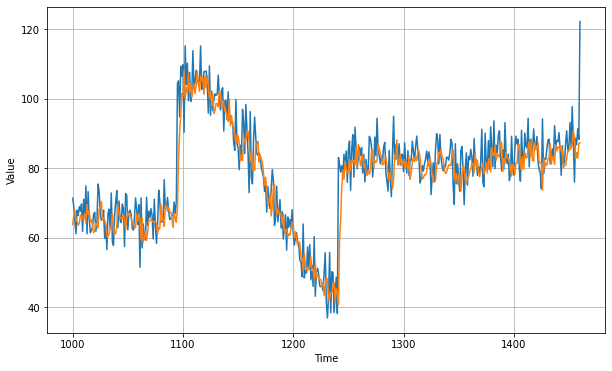

In [5]:
forecast = []

for time in range(len(series) - window_size):
    forecast.append(model.predict(series[time:time + window_size][np.newaxis]))
    # np.newaxis just wraps it in another list

forecast = forecast[split_time-window_size:]
results = np.array(forecast)[:, 0, 0]


plt.figure(figsize=(10, 6))

plot_series(time_valid, x_valid)
plot_series(time_valid, results)

In [6]:
tf.keras.metrics.mean_absolute_error(x_valid, results).numpy()

4.9869394

# 3 Layer Dense

In [7]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(10, input_shape=[window_size], activation="relu"), 
    tf.keras.layers.Dense(10, activation="relu"), 
    tf.keras.layers.Dense(1)
])
# using the same optimiser but different model
model.compile(loss="mse", optimizer=SGDoptimiser)
model.fit(dataset,epochs=100,verbose=0)

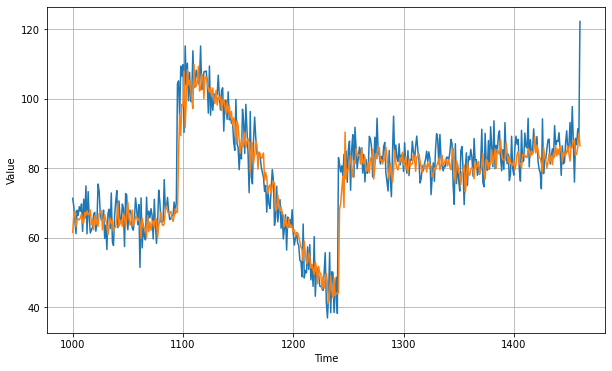

In [8]:
forecast = []
for time in range(len(series) - window_size):
    forecast.append(model.predict(series[time:time + window_size][np.newaxis]))

forecast = forecast[split_time-window_size:]
results = np.array(forecast)[:, 0, 0]


plt.figure(figsize=(10, 6))

plot_series(time_valid, x_valid)
plot_series(time_valid, results)

In [16]:
tf.keras.metrics.mean_absolute_error(x_valid, results).numpy()

5.018441

we set up a learning rate scheduler to slowly increase the step sizes through each epoch to see how it affects loss. We run this for a few epochs to see what is a good learning rate to use. We then fix the learning rate at that and re-run the model if we wish over a larger number of epochs to improve the model weights. 

In [36]:
# same model but with dynamic optimiser
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(10, input_shape=[window_size], activation="relu"), 
    tf.keras.layers.Dense(10, activation="relu"), 
    tf.keras.layers.Dense(1)
])

LearningRate_Scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-8 * 10**(epoch / 20))

SGDoptimiser = tf.keras.optimizers.SGD(learning_rate=1e-8, momentum=0.9)

model.compile(loss="mse", optimizer=SGDoptimiser)

history = model.fit(dataset, epochs=100, callbacks=[LearningRate_Scheduler], verbose=0)

Text(0, 0.5, 'Loss')

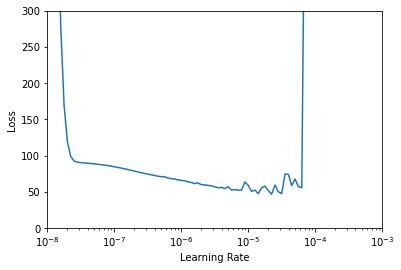

In [37]:
# plot learning rate against loss
LearningRate_Scheduler_vals = 1e-8 * (10 ** (np.arange(100) / 20))
plt.semilogx(LearningRate_Scheduler_vals, history.history["loss"])
plt.axis([1e-8, 1e-3, 0, 300])
plt.xlabel("Learning Rate")
plt.ylabel("Loss")

Based on the above, we can see that the loss is reduced and stabilised when learning rate is between $10^{-4}$ and $10^{-6}$. When step sizes get bigger than $10^{-4}$ the objective function quickly diverges as minimum is passed. On the other hand, when step size is smaller than $10^{-6}$, training is very slow. You then re-run the model with SGD set at that learning rate. 

In [38]:
# same model but with optimised learning rate
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(10, input_shape=[window_size], activation="relu"), 
    tf.keras.layers.Dense(10, activation="relu"), 
    tf.keras.layers.Dense(1)
])

SGDoptimiser = tf.keras.optimizers.SGD(learning_rate=8e-6, momentum=0.9) 
model.compile(loss="mse", optimizer=SGDoptimiser)
history = model.fit(dataset, epochs=500, verbose=0)

Text(0, 0.5, 'loss')

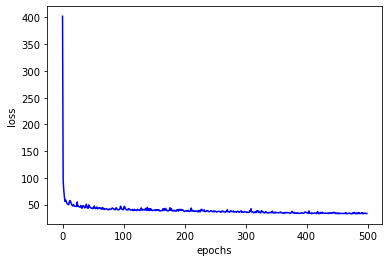

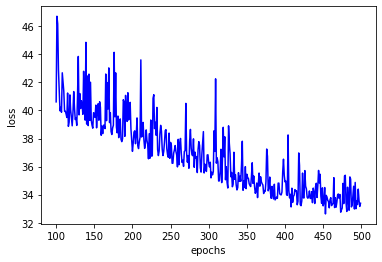

In [41]:
# plot the epochs against loss and see how learning rate affected loss reduction
loss = history.history['loss']
epochs = range(len(loss))

plt.figure()
plt.plot(epochs, loss, 'b', label='Training Loss')
plt.xlabel("epochs")
plt.ylabel("loss")

plt.figure()
plt.plot(epochs[100:], loss[100:], 'b', label='Training Loss')
plt.xlabel("epochs")
plt.ylabel("loss")

# loss is very volatile and so the learning has not been great. We may need to make improvements

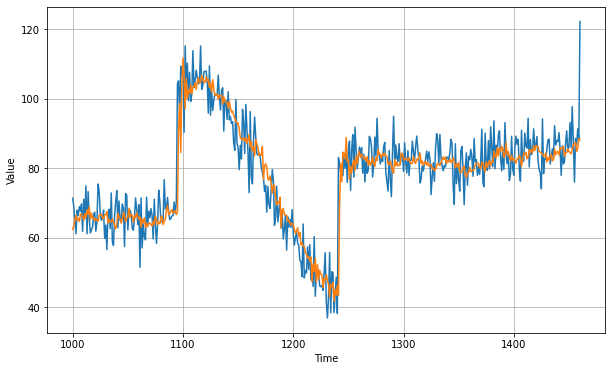

In [42]:
forecast = []
for time in range(len(series) - window_size):
  forecast.append(model.predict(series[time:time + window_size][np.newaxis]))

forecast = forecast[split_time-window_size:]
results = np.array(forecast)[:, 0, 0]


plt.figure(figsize=(10, 6))

plot_series(time_valid, x_valid)
plot_series(time_valid, results)

In [43]:
tf.keras.metrics.mean_absolute_error(x_valid, results).numpy()

4.650956